# Income Classsification Model

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# The "adult" data set that contains Census information from 1994

In [3]:
df = pd.read_csv("adultData.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

## Exploratory Data Analysis


In [5]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [7]:
# + non-numeric data
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
count,32399.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32236.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.589216,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,615.907773,87.303830,40.450428,NaN,NaN
std,13.647862,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,2420.191974,402.960219,12.353748,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
df.corr()

C:\Users\shpin\AppData\Local\Temp\ipykernel_2040\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076267,0.036761,0.124901,0.057545,0.067066
fnlwgt,-0.076267,1.000000,-0.043195,-0.002234,-0.010252,-0.018130
education-num,0.036761,-0.043195,1.000000,0.167089,0.079923,0.147256
capital-gain,0.124901,-0.002234,0.167089,1.000000,-0.055138,0.101594
capital-loss,0.057545,-0.010252,0.079923,-0.055138,1.000000,0.054500
hours-per-week,0.067066,-0.018130,0.147256,0.101594,0.054500,1.000000


### Removing unnecessary features
* 'fnlwgt' - is not directly relevant for income prediction
* 'education-num' - captures similar information as 'education'

In [9]:
df = df.drop(columns=['fnlwgt', 'education-num'])
print(df.columns)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income_binary'],
      dtype='object')


### Addressing missingness

In [10]:
missing_values = df.isnull().sum()
missing_values

age                162
workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [11]:
# rows with many missing values
missing_values_per_row = df.isnull().sum(axis=1)
rows_with_many_missing_values = df[missing_values_per_row > 2]
len(rows_with_many_missing_values)

60

In [12]:
# the rows above have a small proportion of df, they can be dropped 
df.drop(rows_with_many_missing_values.index, inplace=True)

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

age                153
workclass         1776
education            0
marital-status       0
occupation        1783
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     301
native-country     556
income_binary        0
dtype: int64


In [14]:
# proportion of misssing values in age is small, can use imputation 
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

In [15]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [17]:
rows_with_missing_workclass_hours = df[(df['workclass'].isnull() & df['occupation'].isnull()) & (df['hours-per-week'] != 0)]
len(rows_with_missing_workclass_hours)
# hours-per-week !=0 means that there should be an occupation/workclass 

1776

In [18]:
# replace missing values with the new category Unknown 
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)

In [19]:
df[df['hours-per-week'].isna()]

,age,workclass,education,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
17,32.0,Private,HS-grad,Never-married,Machine-op-inspct,Unmarried,White,Non-Female,0,0,NaN,United-States,<=50K
24,59.0,Private,HS-grad,Divorced,Tech-support,Unmarried,White,Female,0,0,NaN,United-States,<=50K
96,48.0,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K
98,48.0,Private,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K
119,22.0,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32133,52.0,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Non-Female,0,0,NaN,United-States,>50K
32164,35.0,Private,Bachelors,Never-married,Sales,Not-in-family,White,Non-Female,10520,0,NaN,United-States,>50K
32193,68.0,Private,10th,Divorced,Transport-moving,Not-in-family,White,Non-Female,0,0,NaN,United-States,<=50K
32276,29.0,Local-gov,Some-college,Never-married,Protective-serv,Own-child,White,Non-Female,0,0,NaN,United-States,<=50K


In [20]:
# calculate the mean hours per week for each occupation
occupation_mean_hours = df.groupby('occupation')['hours-per-week'].mean()

# impute missing hours-per-week based on occupation mean
def impute_hours(row):
    if pd.isnull(row['hours-per-week']):
        return occupation_mean_hours.get(row['occupation'], row['hours-per-week'])
    return row['hours-per-week']

# apply the impute_hours function to the 'hours-per-week' column
df['hours-per-week'] = df.apply(impute_hours, axis=1)


In [21]:
# replacing the rest missing values with 0
df['hours-per-week'].fillna(0, inplace=True)

In [22]:
df.shape

(32501, 13)

In [23]:
country_counts = df['native-country'].value_counts()
country_counts

United-States                 29138
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [24]:
# since United-States constitutes a significant majority, the data can be devided into 2 groups:
df['native-country'] = df['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Not-United-States')

In [25]:
counts_country = df['native-country'].value_counts()
print(counts_country)

United-States        29138
Not-United-States     3363
Name: native-country, dtype: int64


In [26]:
missing_values = df.isnull().sum()
print(missing_values)

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


### Cleaning (Mapping) data

In [27]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [28]:
cleaned_marital_status = {
    'Never-married': 'Never-married',
    'Married-civ-spouse': 'Married',
    'Divorced': 'Divorced',
    'Married-spouse-absent': 'Separated',
    'Separated': 'Separated',
    'Married-AF-spouse': 'Married',
    'Widowed': 'Widowed'
}

df['marital-status'] = df['marital-status'].replace(cleaned_marital_status)

print(df['marital-status'].unique())

['Never-married' 'Married' 'Divorced' 'Separated' 'Widowed']


In [29]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [30]:
# mapping to clean education levels
education_mapping = {
    'Bachelors': 'Bachelors',
    'HS-grad': 'HS',
    '11th': 'HS',
    'Masters': 'Masters',
    '9th': 'HS',
    'Some-college': 'Some-college',
    'Assoc-acdm': 'Associate',
    'Assoc-voc': 'Associate',
    '7th-8th': 'Mid-school',
    'Doctorate': 'Doctorate',
    'Prof-school': 'Prof-school',
    '5th-6th': 'Mid-school',
    '10th': 'HS',
    '1st-4th': 'Elem-school',
    'Preschool': 'Preschool',
    '12th': 'HS'
}

df['education'] = df['education'].map(education_mapping)

print(df['education'].unique())

['Bachelors' 'HS' 'Masters' 'Some-college' 'Associate' 'Mid-school'
 'Doctorate' 'Prof-school' 'Elem-school' 'Preschool']


### Checking Label Imbalance


In [33]:
# conver label into numerical value
df['income_>50K'] = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

# drop the original 'income_binary' column
df = df.drop(columns=['income_binary'])

In [35]:
num_instances_class_0 = df['income_>50K'].value_counts()[0]
num_instances_class_1 = df['income_>50K'].value_counts()[1]

total_instances = len(df)

base_rate_class_0 = num_instances_class_0 / total_instances
base_rate_class_1 = num_instances_class_1 / total_instances

print(f"Base Rate for Class '<=50K': {base_rate_class_0:.2f}")
print(f"Base Rate for Class '>50K': {base_rate_class_1:.2f}")

Base Rate for Class '<=50K': 0.76
Base Rate for Class '>50K': 0.24


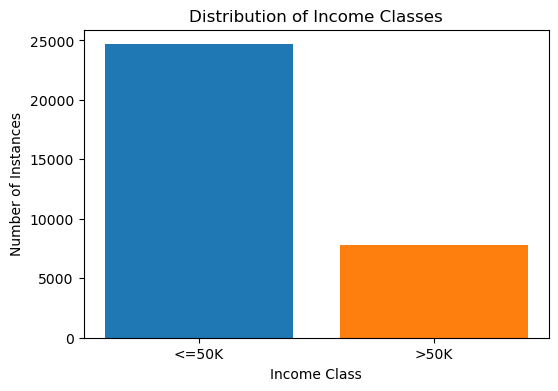

In [42]:
plt.figure(figsize=(6, 4))
plt.bar(['<=50K', '>50K'], [num_instances_class_0, num_instances_class_1], color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Income Classes')
plt.xlabel('Income Class')
plt.ylabel('Number of Instances')
plt.show()

# Don't need to solve fot imbalance as the base rate is greater than 5%

### Exploring Feature Distribution

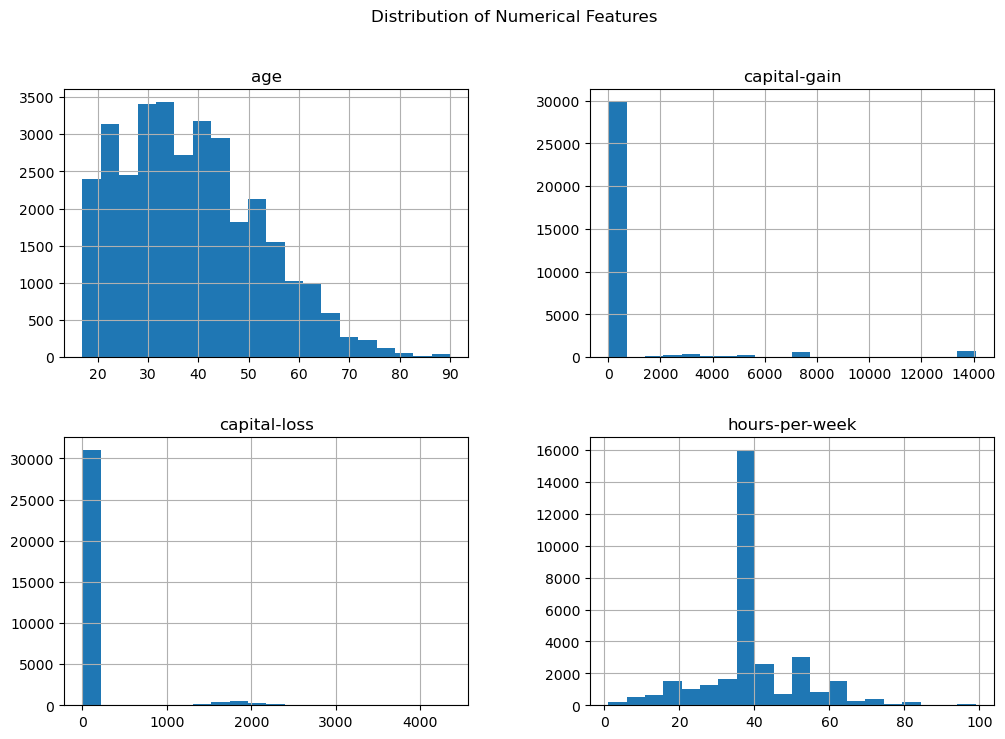

In [43]:
numerical_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [44]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']

for feature in categorical_features:
    category_counts = df[feature].value_counts()
    print(f"Distribution for {feature}:")
    print(category_counts)
    print("\n")

Distribution for workclass:
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1776
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


Distribution for education:
HS              13535
Some-college     7272
Bachelors        5347
Associate        2444
Masters          1721
Mid-school        976
Prof-school       574
Doctorate         413
Elem-school       168
Preschool          51
Name: education, dtype: int64


Distribution for marital-status:
Married          14981
Never-married    10657
Divorced          4438
Separated         1436
Widowed            989
Name: marital-status, dtype: int64


Distribution for occupation:
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1783
Tran

### Performing One-hot Encoding on categorical features

In [45]:
df.dtypes

age               float64
workclass          object
education          object
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_>50K         int64
dtype: object

In [46]:
# list for one-hot encoded
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']

# extract the original numeric columns
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_>50K']
numeric_data = df[numeric_columns]

encoded_data = pd.get_dummies(df, columns=columns_to_encode)

# drop the original numeric columns
encoded_data = encoded_data.drop(columns=numeric_columns)

# combine the encoded data with the original numeric columns
combined_data = pd.concat([numeric_data, encoded_data], axis=1)

df = combined_data


In [47]:
df.shape

(32501, 59)

In [48]:
df.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_>50K',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unknown', 'workclass_Without-pay', 'education_Associate',
       'education_Bachelors', 'education_Doctorate', 'education_Elem-school',
       'education_HS', 'education_Masters', 'education_Mid-school',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
  

### Checking the correlations between the label and other variables in a dataset

In [49]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['income_>50K'].abs().sort_values(ascending=False)

correlation_with_target

income_>50K                         1.000000
marital-status_Married              0.445151
relationship_Husband                0.401017
capital-gain                        0.347489
marital-status_Never-married        0.318505
age                                 0.233277
hours-per-week                      0.228994
relationship_Own-child              0.228505
sex_selfID_Non-Female               0.215891
sex_selfID_Female                   0.215891
occupation_Exec-managerial          0.214852
education_HS                        0.205478
relationship_Not-in-family          0.188566
occupation_Prof-specialty           0.185833
education_Bachelors                 0.180522
education_Masters                   0.174831
occupation_Other-service            0.156620
education_Prof-school               0.154928
capital-loss                        0.151188
relationship_Unmarried              0.142706
workclass_Self-emp-inc              0.139473
education_Doctorate                 0.132606
marital-st

In [50]:
# Strong Positive Correlations:
# 'marital-status_Married', 'relationship_Husband': 
# Being married or having a husband is positively correlated with having income >$50k
# 'capital-gain', 'age', 'hours-per-week': these features are positively correlated with higher income

# Various education-related features are moderately positively correlated with higher income

## Implementation Using Logistic Regression Model

In [51]:
y = df['income_>50K']
X = df.drop(columns='income_>50K', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [53]:
# standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
        C = Factor that controls how much regularization is applied to the model.
    '''
    model = LogisticRegression(C=c)

    model.fit(X_train, y_train)
    
    probability_predictions = model.predict_proba(X_test)    

    l_loss = log_loss(y_test, probability_predictions)    
        
    class_label_predictions = model.predict(X_test)    
        
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return l_loss, acc_score

In [55]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.32052037216556417
Accuracy: 0.8466823915495847


### Choosing best C parameter

In [56]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [57]:
ll_cs = []
acc_cs = []

for c_value in cs:
    loss, accuracy = train_test_LR(X_train, y_train, X_test, y_test, c=c_value)
    
    ll_cs.append(loss)
    acc_cs.append(accuracy)
    

In [58]:
print("\nResults for different values of 'c':")
print("{:<10} {:<15} {:<15}".format("c", "Log Loss", "Accuracy"))
print("-" * 40)

for i, c_value in enumerate(cs):
    print("{:<10} {:<15.6f} {:<15.6f}".format(c_value, ll_cs[i], acc_cs[i]))



Results for different values of 'c':
c          Log Loss        Accuracy       
----------------------------------------
1e-10      0.551680        0.759512       
1e-09      0.551638        0.759512       
1e-08      0.551589        0.759512       
1e-07      0.551099        0.759512       
1e-06      0.546318        0.759512       
1e-05      0.507890        0.759512       
0.0001     0.394594        0.809866       
0.001      0.330061        0.847093       
0.01       0.320753        0.847298       
0.1        0.320381        0.846682       
1          0.320520        0.846682       
10         0.320719        0.846682       
100        0.320929        0.846682       
1000       0.321244        0.846682       
10000      0.321545        0.846682       
100000     0.321600        0.846682       
1000000    0.321603        0.846682       
10000000   0.321604        0.846682       
100000000  0.321604        0.846682       
1000000000 0.321604        0.846682       


In [59]:
# Chosen value of C (1) already shows the highest accuracy and the lowest log loss

## Implementation Using Gradient Boosting

In [60]:
n_estimators_list = [50, 100, 200, 300]
learning_rates = [0.1, 0.01, 0.001]

In [61]:
def train_test_GB(X_train, y_train, X_test, y_test, n_estimators=100, learning_rate=0.1):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    
    model.fit(X_train, y_train)
    
    probability_predictions = model.predict_proba(X_test)    
    l_loss = log_loss(y_test, probability_predictions)    
        
    class_label_predictions = model.predict(X_test)    
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return l_loss, acc_score

In [62]:
gb_results = []

for n_estimators in n_estimators_list:
    for learning_rate in learning_rates:
        loss, accuracy = train_test_GB(X_train, y_train, X_test, y_test, n_estimators=n_estimators, learning_rate=learning_rate)
        gb_results.append((n_estimators, learning_rate, loss, accuracy))
        
gb_results_df = pd.DataFrame(gb_results, columns=['n_estimators', 'learning_rate', 'log_loss', 'accuracy'])

In [63]:
print("\nGradient Boosting Results:")
print(gb_results_df)


Gradient Boosting Results:
    n_estimators  learning_rate  log_loss  accuracy
0             50          0.100  0.313592  0.859194
1             50          0.010  0.447653  0.804328
2             50          0.001  0.535561  0.759512
3            100          0.100  0.295653  0.863911
4            100          0.010  0.400119  0.817865
5            100          0.001  0.521416  0.759512
6            200          0.100  0.284928  0.868321
7            200          0.010  0.356293  0.846887
8            200          0.001  0.497504  0.759512
9            300          0.100  0.279131  0.873449
10           300          0.010  0.335169  0.856630
11           300          0.001  0.477946  0.759512


In [64]:
# best result:
# n_estimators  learning_rate  log_loss  accuracy
# 9        300          0.100  0.279154  0.873346

### Cross Validation

In [65]:
# GB  with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)

num_folds = 5  # num of cross-validation folds
scoring_metric = 'neg_log_loss'  # scoring metric

cross_val_scores = cross_val_score(best_gb_classifier, X, y, cv=num_folds, scoring=scoring_metric)

print("Cross-Validation Scores:")
print(cross_val_scores)
print("Mean Log Loss:", -cross_val_scores.mean())  # convert back to positive log loss
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores:
[-0.28439093 -0.2848982  -0.28079561 -0.27796991 -0.27777647]
Mean Log Loss: 0.2811662255279641
Standard Deviation: 0.0030387695970124045


### Comparing two models

The mean log loss of 0.281 indicates that, on average, the model's predicted probabilities are well-calibrated and are providing a good measure of uncertainty. The small standard deviation suggests that the model's performance is consistent across different folds, which means that the model is not overly sensitive to the specific data splits.

These results indicate that Gradient Boosting model with the chosen hyperparameters (n_estimators=300 and learning_rate=0.1) is performing well and generalizing effectively to unseen data.

Logistic Regression model produces promising results:
    Log loss: 0.320520   Accuracy: 0.846682
However, Gradient Boosting model demonstrates superior performance:
    Log loss: 0.279154   Accuracy: 0.873346

### ROC curve and AUC

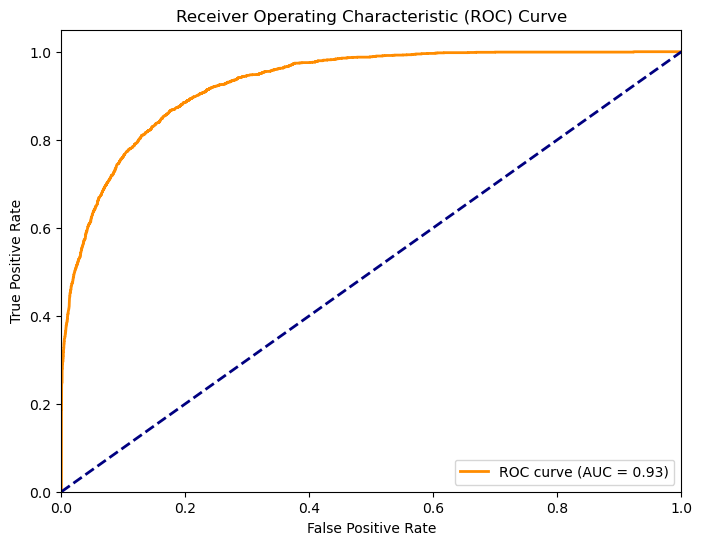

In [66]:
final_gb_classifier = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1)
final_gb_classifier.fit(X_train, y_train)

y_prob = final_gb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


AUC of 0.93 suggests that the model is making accurate predictions and effectively differentiating between instances with different income levels.